# import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score ,mean_squared_error , accuracy_score
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from tensorflow import keras

import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense, Dropout
# import seaborn as sns



# Import Datasets

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

,month,season,lat,lon,chl_df_a,sst,Species Category,Scientific Name,English Name,Local Name,Fish Temp In Category
0,2010-04-05,1,22.517914,67.195389,0.6,27.6,14,35,29,85,1
1,2010-04-05,1,22.517914,67.195389,0.6,27.6,5,11,16,89,1
2,2010-04-05,1,22.517914,67.195389,0.6,27.6,12,102,108,63,2
3,2010-04-05,1,22.517914,67.195389,0.6,27.6,12,79,31,77,2
4,2010-04-05,1,22.517914,67.195389,0.6,27.6,12,80,10,76,2


In [4]:
df.drop(['month','Species Category','Scientific Name','Local Name'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385150 entries, 0 to 385149
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   season                 385150 non-null  int64  
 1   lat                    385150 non-null  float64
 2   lon                    385150 non-null  float64
 3   chl_df_a               385150 non-null  float64
 4   sst                    385150 non-null  float64
 5   English Name           385150 non-null  int64  
 6   Fish Temp In Category  385150 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 20.6 MB


In [6]:
# df.plot()

In [7]:
df['lat'].unique().shape

(50,)

In [8]:
df['lon'].unique().shape

(50,)

In [9]:
df.columns

Index(['season', 'lat', 'lon', 'chl_df_a', 'sst', 'English Name',
       'Fish Temp In Category'],
      dtype='object')

In [10]:
df['Fish Temp In Category'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [11]:
df.head()

,season,lat,lon,chl_df_a,sst,English Name,Fish Temp In Category
0,1,22.517914,67.195389,0.6,27.6,29,1
1,1,22.517914,67.195389,0.6,27.6,16,1
2,1,22.517914,67.195389,0.6,27.6,108,2
3,1,22.517914,67.195389,0.6,27.6,31,2
4,1,22.517914,67.195389,0.6,27.6,10,2


In [12]:
data = df.copy()

## split the data into training and testing sets

In [13]:
data1 = pd.read_csv('../data/cat_data_eng.csv')

In [14]:
data1.drop('month',axis=1,inplace=True)

In [15]:
data1

,season,lat,lon,chl_df_a,sst,English Name,Fish Temp In Category
0,1,22.517914,67.195389,0.6,27.6,Golden snapper,Group 2
1,1,22.517914,67.195389,0.6,27.6,Cross crab,Group 2
2,1,22.517914,67.195389,0.6,27.6,snake fish,Group 3
3,1,22.517914,67.195389,0.6,27.6,Greater lizard fish,Group 3
4,1,22.517914,67.195389,0.6,27.6,"Brush tooth , lizard fish",Group 3
...,...,...,...,...,...,...,...
385145,2,20.480785,69.242325,1.0,27.7,Indian hailbat,Group 2
385146,2,20.480785,69.242325,1.0,27.7,Painted sweet lip,Group 2
385147,2,20.480785,69.242325,1.0,26.0,Spiny lobster,Group 1
385148,2,20.480785,69.242325,1.0,26.0,Indian hailbat,Group 2


In [16]:
   # Perform any necessary data cleaning and preprocessing here
data = df.copy()
# Step 2: Encode categorical variables
cat_vars = ['English Name','Fish Temp In Category']
label_encoders = {}
for var in cat_vars:
    label_encoders[var] = LabelEncoder()
    data[var] = label_encoders[var].fit_transform(data1[var])


In [17]:
data

,season,lat,lon,chl_df_a,sst,English Name,Fish Temp In Category
0,1,22.517914,67.195389,0.6,27.6,29,1
1,1,22.517914,67.195389,0.6,27.6,16,1
2,1,22.517914,67.195389,0.6,27.6,108,2
3,1,22.517914,67.195389,0.6,27.6,31,2
4,1,22.517914,67.195389,0.6,27.6,10,2
...,...,...,...,...,...,...,...
385145,2,20.480785,69.242325,1.0,27.7,39,1
385146,2,20.480785,69.242325,1.0,27.7,65,1
385147,2,20.480785,69.242325,1.0,26.0,89,0
385148,2,20.480785,69.242325,1.0,26.0,39,1


In [18]:
# split the data into training and testing sets
X = data[['season', 'English Name', 'Fish Temp In Category']]
y = data[['lat', 'lon']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Algo 1

## Define and train the deep learning model:

In [24]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
9629/9629 [==============================] - 20s 2ms/step - loss: 33.1415 - val_loss: 0.3646
Epoch 2/10
9629/9629 [==============================] - 17s 2ms/step - loss: 0.3564 - val_loss: 0.3540
Epoch 3/10
9629/9629 [==============================] - 16s 2ms/step - loss: 0.3468 - val_loss: 0.3353
Epoch 4/10
9629/9629 [==============================] - 17s 2ms/step - loss: 0.3411 - val_loss: 0.3465
Epoch 5/10
9629/9629 [==============================] - 18s 2ms/step - loss: 0.3374 - val_loss: 0.3314
Epoch 6/10
9629/9629 [==============================] - 18s 2ms/step - loss: 0.3351 - val_loss: 0.3300
Epoch 7/10
9629/9629 [==============================] - 17s 2ms/step - loss: 0.3316 - val_loss: 0.3237
Epoch 8/10
9629/9629 [==============================] - 17s 2ms/step - loss: 0.3256 - val_loss: 0.3346
Epoch 9/10
9629/9629 [==============================] - 18s 2ms/step - loss: 0.3234 - val_loss: 0.3282
Epoch 10/10
9629/9629 [==============================] - 18s 2ms/step - 

In [25]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

2408/2408 [==============================] - 4s 2ms/step - loss: 0.3190
Test loss: 0.3189990818500519


In [26]:
model.save('../models/algo1_ann.h5')

In [36]:
algo1 = tf.keras.models.load_model('../models/algo1_ann.h5')

input_data = pd.DataFrame({'season': [2], 'English Name': [85], 'Fish Temp In Category': [1]})
# normalize and reshape the input data
input_data = scaler.transform(input_data)
# input_data = np.reshape(input_data, (1, 1, input_data.shape[1]))
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
import json
# make predictions
predictions = algo1.predict(input_data)
# print(f"Predicted latitude: {predictions[0][0]}")
# print(f"Predicted longitude: {predictions[0][1]}")
predictions = np.array(predictions, dtype=np.float32)
predictions_list = predictions.tolist()
json_predictions = json.dumps(predictions_list)


1/1 [==============================] - 0s 49ms/step
[[21.69988 68.03562]]
[[21.699880599975586, 68.0356216430664]]


### Algo 2

## Define and train the LSTM model:

In [27]:
# Reshape the input data to 3D tensors
X_train_3d = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_3d = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [28]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(1, 3)),
    tf.keras.layers.Dense(2)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_3d, y_train, epochs=10, batch_size=32, validation_data=(X_test_3d, y_test))


Epoch 1/10
9629/9629 [==============================] - 28s 3ms/step - loss: 130.6193 - val_loss: 0.3622
Epoch 2/10
9629/9629 [==============================] - 23s 2ms/step - loss: 0.3461 - val_loss: 0.3417
Epoch 3/10
9629/9629 [==============================] - 23s 2ms/step - loss: 0.3379 - val_loss: 0.3360
Epoch 4/10
9629/9629 [==============================] - 31s 3ms/step - loss: 0.3331 - val_loss: 0.3328
Epoch 5/10
9629/9629 [==============================] - 26s 3ms/step - loss: 0.3288 - val_loss: 0.3347
Epoch 6/10
9629/9629 [==============================] - 24s 2ms/step - loss: 0.3244 - val_loss: 0.3209
Epoch 7/10
9629/9629 [==============================] - 25s 3ms/step - loss: 0.3202 - val_loss: 0.3272
Epoch 8/10
9629/9629 [==============================] - 25s 3ms/step - loss: 0.3155 - val_loss: 0.3132
Epoch 9/10
9629/9629 [==============================] - 25s 3ms/step - loss: 0.3107 - val_loss: 0.3091
Epoch 10/10
9629/9629 [==============================] - 23s 2ms/step -

In [29]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_3d, y_test)
print('Test loss:', loss)


2408/2408 [==============================] - 4s 2ms/step - loss: 0.3051
Test loss: 0.3050539493560791


In [30]:
model.save('../models/algo2_lstm.h5')

In [27]:
algo2 = tf.keras.models.load_model('../models/algo2_lstm.h5')

input_data = pd.DataFrame({'season': [2], 'English Name': [85], 'Fish Temp In Category': [1]})
# normalize and reshape the input data

input_data = scaler.transform(input_data)

X_new_3d = np.reshape(input_data, (input_data.shape[0], 1, input_data.shape[1]))
# make predictions
predictions = algo2.predict(X_new_3d)
print(f"Predicted latitude: {predictions[0][0]}")
print(f"Predicted longitude: {predictions[0][1]}")

1/1 [==============================] - 0s 200ms/step
Predicted latitude: 21.51580810546875
Predicted longitude: 68.0


##  Algo 3 Final

# RNN model

In [31]:
# reshape the data for the RNN model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [32]:
# define the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=2))

In [33]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/25
9629/9629 [==============================] - 69s 6ms/step - loss: 113.4445 - val_loss: 0.4423
Epoch 2/25
9629/9629 [==============================] - 62s 6ms/step - loss: 11.5287 - val_loss: 0.4826
Epoch 3/25
9629/9629 [==============================] - 62s 6ms/step - loss: 10.1907 - val_loss: 0.4234
Epoch 4/25
9629/9629 [==============================] - 64s 7ms/step - loss: 8.9618 - val_loss: 0.4549
Epoch 5/25
9629/9629 [==============================] - 52s 5ms/step - loss: 7.9086 - val_loss: 0.4207
Epoch 6/25
9629/9629 [==============================] - 46s 5ms/step - loss: 6.9284 - val_loss: 0.4064
Epoch 7/25
9629/9629 [==============================] - 46s 5ms/step - loss: 6.0349 - val_loss: 0.4383
Epoch 8/25
9629/9629 [==============================] - 43s 4ms/step - loss: 5.2385 - val_loss: 0.4486
Epoch 9/25
9629/9629 [==============================] - 46s 5ms/step - loss: 4.4975 - val_loss: 0.3849
Epoch 10/25
9629/9629 [==============================] - 46s 5ms/step

In [35]:
# evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

2408/2408 [==============================] - 4s 2ms/step - loss: 0.2039


In [36]:
test_loss

0.20388010144233704

In [37]:
model.save('../models/algo3_final.h5')

In [38]:

model = keras.models.load_model('../models/algo3_final.h5')
# load the input data
input_data = pd.DataFrame({'season': [2], 'English Name': [85], 'Fish Temp In Category': [1]})
# normalize and reshape the input data
input_data = scaler.transform(input_data)
input_data = np.reshape(input_data, (1, 1, input_data.shape[1]))
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

# make predictions
predictions = model.predict(input_data)

# print the predicted latitude and longitude values
print(f"Predicted latitude: {predictions[0][0]}")
print(f"Predicted longitude: {predictions[0][1]}")


1/1 [==============================] - 1s 1s/step
Predicted latitude: 21.71101951599121
Predicted longitude: 68.0073013305664


22.48110580444336
Predicted longitude: 67.2323989868164

## Algo 4

# ARIMA model

In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Load data into pandas DataFrame
data = pd.read_csv('../data/cat_data_eng.csv')
data.drop(["chl_df_a","sst", "Fish Temp In Category"],axis=1,inplace=True)
# Specify input and output variables
input_vars = ["month", "season", "English Name"]
output_vars = ["lat", "lon"]

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

models = {}
# Train ARIMA model for each output variable
for var in output_vars:
    # Prepare input and output data
    train_input = train_data[input_vars]
    train_output = train_data[var]
    test_input = test_data[input_vars]
    
    # Fit ARIMA model
    arima_model = ARIMA(train_output, order=(1, 1, 1))
    model_fit = arima_model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(train_input), end=len(train_input) + len(test_input) - 1, dynamic=False)
    
    # Print RMSE and MAPE metrics
    rmse = ((test_data[var] - predictions) ** 2).mean() ** 0.5
    mape = (abs(test_data[var] - predictions) / test_data[var]).mean() * 100
    print(f"RMSE for {var}: {rmse:.2f}")
    print(f"MAPE for {var}: {mape:.2f}%")
    
    models[var] = model_fit
    joblib.dump(model_fit, f"../models/ARIMA_{var}_model.pkl")


RMSE for lat: 0.49
MAPE for lat: 2.02%
RMSE for lon: 0.49
MAPE for lon: 0.61%


In [41]:
from datetime import datetime
new_data = pd.DataFrame({
    'month': [datetime(2022, 1, 1).strftime('%Y-%m-%d'),],
    'season': [2],
    'English Name': [1],
})

# Make the prediction for the latitude and longitude variables
for var in output_vars:
    model_fit = models[var]
    exog = new_data[input_vars]
    predictions = model_fit.predict(start=len(train_data) + len(test_data), end=len(train_data) + len(test_data) + len(new_data) - 1, exog=new_data[input_vars], dynamic=False)
    print(f"Predicted {var}: {predictions.values}")

Predicted lat: [21.27069283]
Predicted lon: [68.44861603]


## Algo 5

# RandomForest_model

In [44]:
data = pd.read_csv('../data/data.csv')
data.drop(['month','Species Category','chl_df_a', 'sst','Scientific Name','Local Name'],axis=1,inplace=True)
cat_vars = ['English Name','Fish Temp In Category']
label_encoders = {}
for var in cat_vars:
    label_encoders[var] = LabelEncoder()
    data[var] = label_encoders[var].fit_transform(data[var])
X = data[['season', 'English Name', 'Fish Temp In Category']]
y = data[['lat', 'lon']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the testing set
predictions = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Random Forest Regression MSE:", rmse)



Random Forest Regression MSE: 0.369195705716941


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X, y, cv=5)

array([-62.78317297,  -4.70792488,  -0.69184468, -12.96958883,
       -14.01482169])

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, predictions)

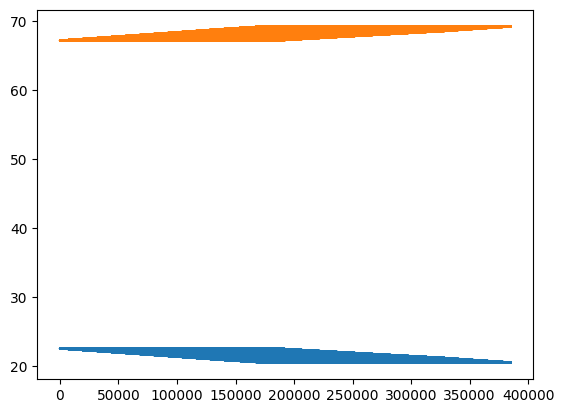

In [ ]:
plt.plot(y_test)

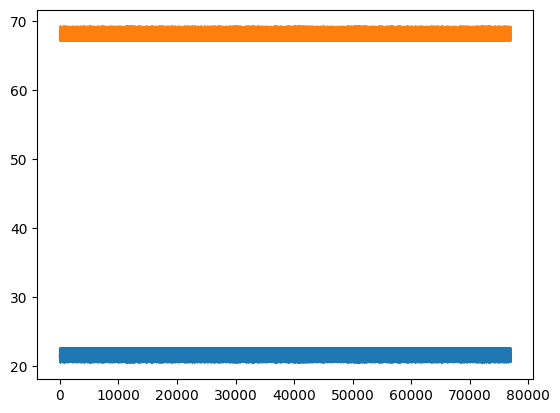

In [ ]:
plt.plot(predictions)

In [46]:
# save model
joblib.dump(rf_model, "../models/RandomForest_model.pkl")

['../models/RandomForest_model.pkl']

### Make prediction Using Random Forest

In [47]:
rf_model = joblib.load("../models/RandomForest_model.pkl")
# Make predictions on new data
new_data = pd.DataFrame({
    'season': [2, 3, 1],
    'English Name': [90, 71, 70],
    "Fish Temp In Category":[2,1,1]
})



input_data = scaler.transform(new_data)

predictions = rf_model.predict(input_data)
print(predictions)

[[22.49715204 67.21624868]
 [21.57154396 68.14631178]
 [21.97745132 67.7384491 ]]


In [ ]:
# # Split the data into training and testing sets for latitude
# y_train_lat = y_train['lat']
# y_test_lat = y_test['lat']

# # Split the data into training and testing sets for longitude
# y_train_lon = y_train['lon']
# y_test_lon = y_test['lon']

# # Gradient Boosting Regression for latitude
# gb_model_lat = GradientBoostingRegressor(n_estimators=100, random_state=42)
# gb_model_lat.fit(X_train, y_train_lat)
# gb_predictions_lat = gb_model_lat.predict(X_test)

# # Gradient Boosting Regression for longitude
# gb_model_lon = GradientBoostingRegressor(n_estimators=100, random_state=42)
# gb_model_lon.fit(X_train, y_train_lon)
# gb_predictions_lon = gb_model_lon.predict(X_test)

# # Combine the predictions
# combined_predictions = np.column_stack((gb_predictions_lat, gb_predictions_lon))

# # Calculate the combined MSE
# combined_mse = mean_squared_error(y_test, combined_predictions)

# print("Combined Model MSE:", combined_mse)


Combined Model MSE: 0.21622587756486605


In [ ]:
# new_data = pd.DataFrame({
#     'season': [1, 2, 3],
#     'English Name': [80, 90, 70],
#     'Fish Temp In Category': [1, 2, 2]
# })

# new_data_scaled = scaler.transform(new_data)
# # Generate predictions using Random Forest Regression
# rf_predictions = rf_model.predict(new_data_scaled)

# # Generate predictions using Gradient Boosting Regression
# gb_predictions_lat = gb_model_lat.predict(new_data_scaled)
# gb_predictions_lon = gb_model_lon.predict(new_data_scaled)

# # Combine the predictions
# combined_predictions = rf_predictions + np.column_stack((gb_predictions_lat, gb_predictions_lon))
# print("Combined Model Predictions:")
# for i in range(len(combined_predictions)):
#     print("Data Point", i+1, ": Lat:", combined_predictions[i][0], ", Lon:", combined_predictions[i][1])


Combined Model Predictions:
Data Point 1 : Lat: 43.79190399822003 , Lon: 135.64068839080704
Data Point 2 : Lat: 44.575822731735286 , Lon: 134.852995084418
Data Point 3 : Lat: 44.161139134934274 , Lon: 135.26967212021106


## Algo 6

# KNN model

In [49]:
# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_pred)
print(f'R2 score: {score:.2f}')
# rmse = mean_squared_error(y_test, predictions, squared=False)
# print("Rmse:", rmse)


# save knn model
joblib.dump(knn_model, "../models/KNN_model.pkl")


R2 score: 0.61


['../models/KNN_model.pkl']

### Make prediction Using KNN

In [50]:
# Select some input data for prediction
X_pred = np.array([
    [ 2, 75,2],
    [3, 82,1],
    [4, 90,3],
])


# Scale the input data using the same scaler used for training
X_pred = scaler.transform(X_pred)

# Make predictions
y_pred = knn_model.predict(X_pred)

# Inverse transform the output data to get the original units
# y_pred = scaler_y.inverse_transform(y_pred)

# Print the predicted output
print(y_pred)


[[22.44307976 67.27057953]
 [21.86935844 67.84706268]
 [22.49296913 67.22045135]]


c:\Users\utamp\anaconda3\envs\ai_exp\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
